### Bay Area Housing Prices

#### In this case, we come up with 3 findings with each one based on different datasets for house value (Source : Zillow Research data)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

#### Prospective Investment Regions based on Average growth rate of Home Values and Rental Prices

#### Home Values

Reading Zillow data

In [3]:
AllHomes = pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')
AllHomes.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
0,275237.0,Roosevelt,Fresno,CA,Fresno,Fresno,22.0,137600.0,138200.0,139000.0,...,164300.0,167400.0,169500.0,170900.0,172100.0,172800.0,173200.0,173900.0,175500.0,177400.0
1,273565.0,East San Jose,San Jose,CA,San Jose,Santa Clara,28.0,527800.0,532300.0,538800.0,...,655900.0,665900.0,673800.0,681600.0,690000.0,699000.0,710300.0,723900.0,740500.0,754500.0
2,273088.0,Bullard,Fresno,CA,Fresno,Fresno,35.0,229900.0,229800.0,229400.0,...,261400.0,264000.0,266500.0,268300.0,269800.0,271600.0,273100.0,274100.0,276000.0,278600.0
3,276652.0,West San Jose,San Jose,CA,San Jose,Santa Clara,42.0,1038300.0,1057900.0,1076800.0,...,1297000.0,1313600.0,1328000.0,1345400.0,1369200.0,1402300.0,1443100.0,1483900.0,1523800.0,1551500.0
4,273480.0,Downtown,San Jose,CA,San Jose,Santa Clara,52.0,588200.0,594200.0,600600.0,...,740100.0,749200.0,752900.0,759100.0,769500.0,781500.0,798400.0,822300.0,850100.0,870300.0


Data Cleansing: handling NaN values

In [4]:
AllHomes.dropna(inplace=True)

Calculating average yearly home values

In [7]:
AllHomes['AverageHomeCostOf2015']= (AllHomes['2015-12']+AllHomes['2015-11']+AllHomes['2015-10']+AllHomes['2015-09']+
                                 AllHomes['2015-08']+AllHomes['2015-07']+AllHomes['2015-06']+AllHomes['2015-05']+
                                 AllHomes['2015-04']+AllHomes['2015-03']+AllHomes['2015-02']+AllHomes['2015-01'])/12
AllHomes['AverageHomeCostOf2016']=(AllHomes['2016-12']+AllHomes['2016-11']+AllHomes['2016-10']+AllHomes['2016-09']+
                                AllHomes['2016-08']+AllHomes['2016-07']+AllHomes['2015-06']+AllHomes['2016-05']+
                                AllHomes['2016-04']+AllHomes['2016-03']+AllHomes['2016-02']+AllHomes['2016-01'])/12
AllHomes['AverageHomeCostOf2017']=(AllHomes['2017-12']+AllHomes['2017-11']+AllHomes['2017-10']+AllHomes['2017-09']+
                                AllHomes['2017-08']+AllHomes['2017-07']+AllHomes['2017-06']+AllHomes['2017-05']+
                                AllHomes['2017-04']+AllHomes['2017-03']+AllHomes['2017-02']+AllHomes['2017-01'])/12

###### Creating a new dataset by formatting and slicing useful columns

In [8]:
AllHomes['AverageHomeCostOf2015'] = AllHomes['AverageHomeCostOf2015'].map('{:.0f}'.format).astype('float', copy =False)
AllHomes['AverageHomeCostOf2016'] = AllHomes['AverageHomeCostOf2016'].map('{:.0f}'.format).astype('float', copy =False)
AllHomes['AverageHomeCostOf2017'] = AllHomes['AverageHomeCostOf2017'].map('{:.0f}'.format).astype('float', copy =False)
Homes_Df = AllHomes.iloc[:,[1,2,3,44,45,46]]
Homes_Df.head()

,RegionName,City,State,AverageHomeCostOf2015,AverageHomeCostOf2016,AverageHomeCostOf2017
0,Roosevelt,Fresno,CA,141792.0,150383.0,167825.0
1,East San Jose,San Jose,CA,556308.0,592142.0,678775.0
2,Bullard,Fresno,CA,232008.0,243200.0,266000.0
3,West San Jose,San Jose,CA,1128200.0,1219758.0,1357933.0
4,Downtown,San Jose,CA,625817.0,677925.0,764142.0


###### Calculate the growth rate over years 2015 till 2017

In [ ]:
Homes_Df['GrowthRate'] = (Homes_Df.loc[:,'AverageHomeCostOf2017'].div(Homes_Df.loc[:,'AverageHomeCostOf2015']).pow(1/3.0)-1)

In [11]:
Homes_Df.head()

,RegionName,City,State,AverageHomeCostOf2015,AverageHomeCostOf2016,AverageHomeCostOf2017,GrowthRate
0,Roosevelt,Fresno,CA,141792.0,150383.0,167825.0,0.057795
1,East San Jose,San Jose,CA,556308.0,592142.0,678775.0,0.068571
2,Bullard,Fresno,CA,232008.0,243200.0,266000.0,0.046629
3,West San Jose,San Jose,CA,1128200.0,1219758.0,1357933.0,0.063728
4,Downtown,San Jose,CA,625817.0,677925.0,764142.0,0.068831


###### Estimating region wise 2018 home prices. 
###### Formula Used: FV(Future Price)= PV(Present Value)*(1+Growth rate)^Number of years

In [ ]:
Homes_Df['EstimatedHomeCostOf2018']=Homes_Df.iloc[:, -2]*(1+Homes_Df.iloc[:, -1]).pow(1)

In [16]:
Homes_Df.head()

,RegionName,City,State,AverageHomeCostOf2015,AverageHomeCostOf2016,AverageHomeCostOf2017,GrowthRate,EstimatedHomeCostOf2018
0,Roosevelt,Fresno,CA,141792.0,150383.0,167825.0,0.057795,1.775245e+05
1,East San Jose,San Jose,CA,556308.0,592142.0,678775.0,0.068571,7.253195e+05
2,Bullard,Fresno,CA,232008.0,243200.0,266000.0,0.046629,2.784034e+05
3,West San Jose,San Jose,CA,1128200.0,1219758.0,1357933.0,0.063728,1.444472e+06
4,Downtown,San Jose,CA,625817.0,677925.0,764142.0,0.068831,8.167384e+05


###### 10 regions with smallest growth rates and home prices from 2015-2018

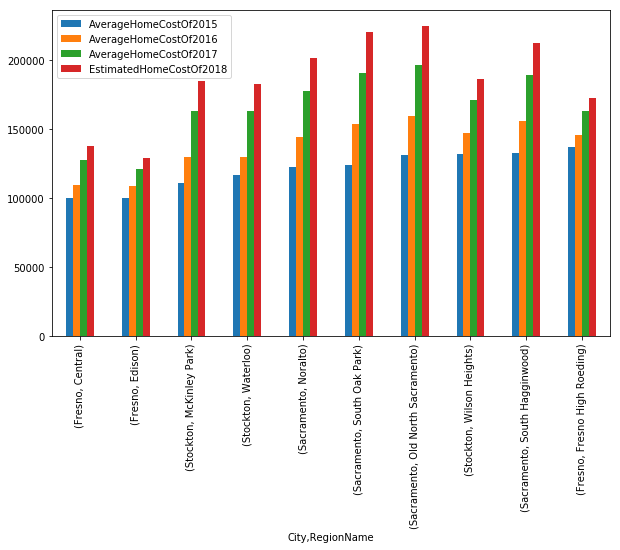

In [17]:
ProspectiveInvestment=Homes_Df.groupby(['City','RegionName'])['AverageHomeCostOf2015','AverageHomeCostOf2016','AverageHomeCostOf2017', 'EstimatedHomeCostOf2018'].mean()
ProspectiveInvestment.nsmallest(10,['AverageHomeCostOf2015','AverageHomeCostOf2016','AverageHomeCostOf2017','EstimatedHomeCostOf2018']).plot(kind='bar', figsize=(10,6));

###### Growth Rates per city

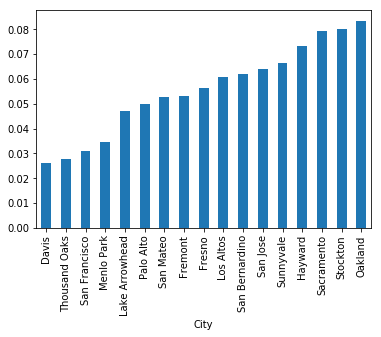

In [18]:
OrderedGrowthRates= Homes_Df.groupby('City')['GrowthRate'].mean().sort_values(axis=0, ascending=True).plot(kind='bar');

In [19]:
LowGrowthRate=Homes_Df.groupby(['City','RegionName'])['GrowthRate'].agg(['min']).sort_values('min', ascending=True)
LowGrowthRate.head(15)

min
City          RegionName                       
San Francisco South Beach             -0.019646
              Marina                  -0.009399
              Pacific Heights         -0.009028
              Yerba Buena             -0.007784
              Financial District      -0.007375
              Cow Hollow               0.001589
              Sea Cliff                0.002682
Davis         Wildhorse                0.002833
San Francisco South of Market          0.003124
              Telegraph Hill           0.004865
              Nob Hill                 0.006638
              Van Ness - Civic Center  0.007131
              Glen Park                0.008242
Menlo Park    Downtown Menlo Park      0.010420
San Francisco North Waterfront         0.012385

Determining the lowest growth rates in Bay Area

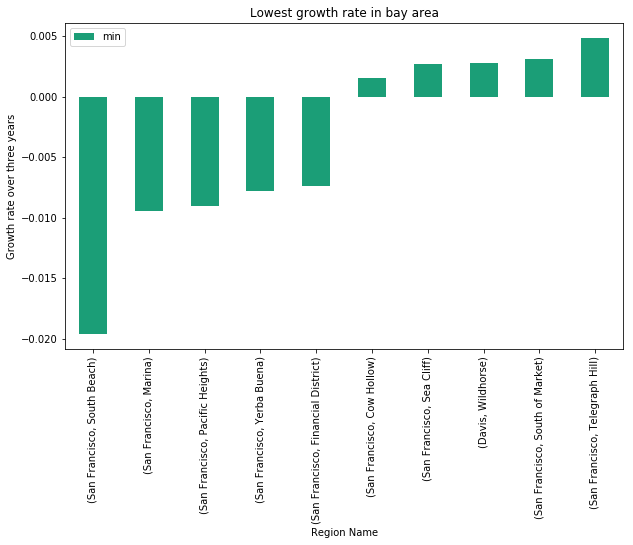

In [86]:
LowGrowthRate.nsmallest(10,['min']).plot(kind='bar', figsize=(10,6),stacked=True, colormap='Dark2');
plt.title('Lowest growth rate in bay area')
# Setting x-axis label
plt.xlabel('Region Name')
# Setting y-axis label
plt.ylabel('Growth rate over three years');

As per the bar chart above, San Francisco has declining growth rates. This can be due to competition and threat from new construction as well as due to political issues, prices are declining as stated in the News Source : https://www.paragon-re.com/trend/san-francisco-home-prices-market-trends-news.

#### Rental Prices

In [23]:
# Read in the dataset for the average rental price of all home types in each neighborhood
RentalPrices = pd.read_csv('Final_Zri.csv')

###### Calculate the average rental price each year


In [24]:
RentalPrices['Average RentalPrices of 2015']=(RentalPrices['2015-12']+RentalPrices['2015-11']+RentalPrices['2015-10']+RentalPrices['2015-09']+RentalPrices['2015-08']+RentalPrices['2015-07']+
RentalPrices['2015-06']+RentalPrices['2015-05']+RentalPrices['2015-04']+RentalPrices['2015-03']+RentalPrices['2015-02']+RentalPrices['2015-01'])/12
RentalPrices['Average RentalPrices of 2016']=(RentalPrices['2016-12']+RentalPrices['2016-11']+RentalPrices['2016-10']+RentalPrices['2016-09']+RentalPrices['2016-08']+RentalPrices['2016-07']+
RentalPrices['2016-06']+RentalPrices['2016-05']+RentalPrices['2016-04']+RentalPrices['2016-03']+RentalPrices['2016-02']+RentalPrices['2016-01'])/12
RentalPrices['Average RentalPrices of 2017']=(RentalPrices['2017-12']+RentalPrices['2017-11']+RentalPrices['2017-10']+RentalPrices['2017-09']+RentalPrices['2017-08']+RentalPrices['2017-07']+
RentalPrices['2017-06']+RentalPrices['2017-05']+RentalPrices['2017-04']+RentalPrices['2017-03']+RentalPrices['2017-02']+RentalPrices['2017-01'])/12

###### Slice out useful columns to make new dataset

In [25]:
RentalPrices2=RentalPrices.iloc[:,[1,2,3,44,45,46]]
RentalPrices2.head()

,RegionName,City,State,Average RentalPrices of 2015,Average RentalPrices of 2016,Average RentalPrices of 2017
0,Roosevelt,Fresno,CA,1038.250000,1083.500000,1125.833333
1,East San Jose,San Jose,CA,2773.750000,3048.166667,3160.916667
2,Bullard,Fresno,CA,1356.416667,1385.000000,1424.500000
3,West San Jose,San Jose,CA,3603.166667,3699.750000,3668.916667
4,Downtown,San Jose,CA,2941.416667,3147.416667,3161.166667


###### Calculate the growth rate over years 2015 till 2017


In [ ]:
# Calculate the growth rate over years 2015 till 2017
RentalPrices2['RentalPricesGrowthRate'] = (RentalPrices2.iloc[:,-1].div(RentalPrices2.iloc[:, 3]))**(1/3.0)-1

In [28]:
RentalPrices2.head()

,RegionName,City,State,Average RentalPrices of 2015,Average RentalPrices of 2016,Average RentalPrices of 2017,RentalPricesGrowthRate
0,Roosevelt,Fresno,CA,1038.250000,1083.500000,1125.833333,-0.970241
1,East San Jose,San Jose,CA,2773.750000,3048.166667,3160.916667,-0.974776
2,Bullard,Fresno,CA,1356.416667,1385.000000,1424.500000,-0.977021
3,West San Jose,San Jose,CA,3603.166667,3699.750000,3668.916667,-0.988117
4,Downtown,San Jose,CA,2941.416667,3147.416667,3161.166667,-0.979783


###### Estimating 2018 rental price per region.
###### Formula used : FV(Future Price)= PV(Present Value)*(1+Growth rate)^Number of years

In [ ]:
RentalPrices2['EstimatedRentCostOf2018']=RentalPrices2.iloc[:, -2]*(1+RentalPrices2.iloc[:, -1]).pow(1)

In [30]:
RentalPrices2.head()

,RegionName,City,State,Average RentalPrices of 2015,Average RentalPrices of 2016,Average RentalPrices of 2017,RentalPricesGrowthRate,EstimatedRentCostOf2018
0,Roosevelt,Fresno,CA,1038.250000,1083.500000,1125.833333,-0.970241,33.503977
1,East San Jose,San Jose,CA,2773.750000,3048.166667,3160.916667,-0.974776,79.731598
2,Bullard,Fresno,CA,1356.416667,1385.000000,1424.500000,-0.977021,32.733877
3,West San Jose,San Jose,CA,3603.166667,3699.750000,3668.916667,-0.988117,43.597885
4,Downtown,San Jose,CA,2941.416667,3147.416667,3161.166667,-0.979783,63.910809


###### Top 10 regions with smallest growth rates in rental prices


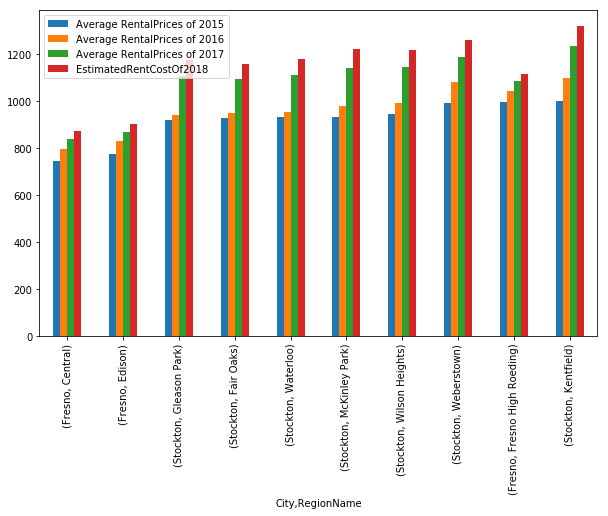

In [68]:
Rent_Trend=RentalPrices2.groupby(['City','RegionName'])['Average RentalPrices of 2015','Average RentalPrices of 2016','Average RentalPrices of 2017','EstimatedRentCostOf2018'].mean();
Rent_Trend.nsmallest(10,['Average RentalPrices of 2015','Average RentalPrices of 2016','Average RentalPrices of 2017','EstimatedRentCostOf2018']).plot(kind='bar', figsize=(10,6));

###### Growth Rates region wise

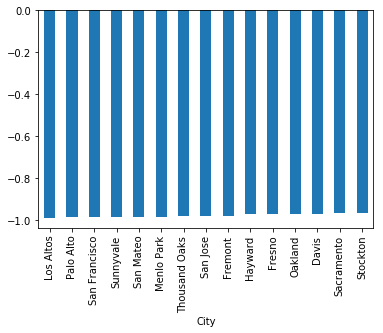

In [31]:
OrderedRentalData= RentalPrices2.groupby('City')['RentalPricesGrowthRate'].mean().sort_values(axis=0, ascending=True).plot(kind='bar');

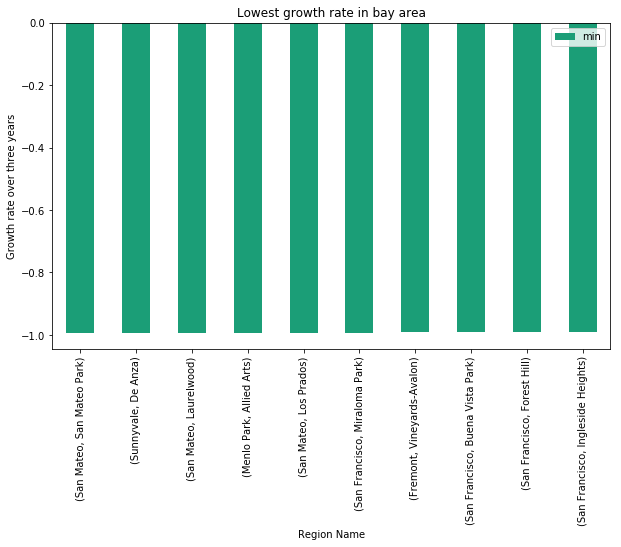

In [35]:
LWGrowthRate=RentalPrices2.groupby(['City','RegionName'])['RentalPricesGrowthRate'].agg(['min']).sort_values('min', ascending=True)
LWGrowthRate.nsmallest(10,['min']).plot(kind='bar', figsize=(10,6),stacked=True, colormap='Dark2');
plt.title('Lowest growth rate in bay area')
# Setting x-axis label
plt.xlabel('Region Name')
# Setting y-axis label
plt.ylabel('Growth rate over three years');

###### Correlation between growth rate of House values and Rental Prices

In [37]:
GrowthRateDFAllHomes=Homes_Df.iloc[:,[0,1,6]]
GrowthRateDFRentalPrices=RentalPrices2.iloc[:,[0,1,6]]

In [38]:
JointGrowthRate=GrowthRateDFAllHomes.merge(GrowthRateDFRentalPrices, how='inner')
JointGrowthRate.head()

,RegionName,City,GrowthRate,RentalPricesGrowthRate
0,Roosevelt,Fresno,0.057795,-0.970241
1,East San Jose,San Jose,0.068571,-0.974776
2,Bullard,Fresno,0.046629,-0.977021
3,West San Jose,San Jose,0.063728,-0.988117
4,Downtown,San Jose,0.068831,-0.979783


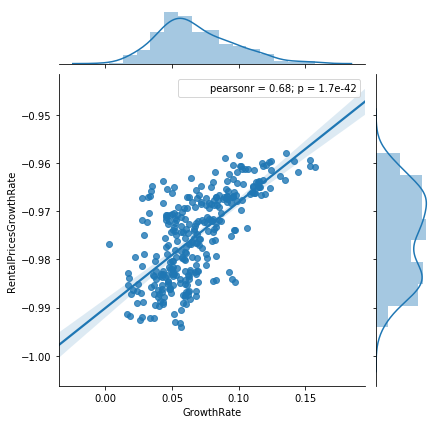

In [39]:
sn.jointplot(x='GrowthRate', y='RentalPricesGrowthRate', data=JointGrowthRate, kind="reg");

From graph above we can find the home value growth rate and rental prices growth rate are highly co-related 

#### Reference links:
#### https://www.mercurynews.com/2017/12/03/home-prices-nearly-doubled-in-this-surprising-california-city/

#### https://www.mercurynews.com/2017/12/03/home-prices-nearly-doubled-in-this-surprising-california-city/

#### http://abc7news.com/business/amazon-narrows-list-for-new-headquarters-edging-out-silicon-valley/2963126/

#### http://www.sacbee.com/news/local/news-columns-blogs/city-beat/article198192614.html


### 3 Bedroom Houses are Preferred more in Bay Area (according to Demand and Home Value)

Reading Bedroom data for the average home value of all home types in each neighborhood 

In [97]:
Bedroom_Data= pd.read_csv("Bedroom_Data_Final.csv")
Bedroom_Data.head()

,RegionID,RegionName,City,State,Metro,CountyName,No of bedrooms,2015-01,2015-02,2015-03,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
0,275237,Roosevelt,Fresno,CA,Fresno,Fresno,1,56500,57400,58000,...,62800,63500,64300,66800,69900,71400,72300,74700,77200,78400
1,273088,Bullard,Fresno,CA,Fresno,Fresno,1,86500,86100,86100,...,92600,92600,94400,97900,99800,102600,106500,110100,110900,110400
2,276652,West San Jose,San Jose,CA,San Jose,Santa Clara,1,434000,442500,451800,...,611800,611500,607800,607000,610000,611700,621700,641000,654400,659400
3,273480,Downtown,San Jose,CA,San Jose,Santa Clara,1,474900,477900,481800,...,617300,622600,628100,632800,638000,647800,663000,679400,693500,701700
4,274756,North Valley,San Jose,CA,San Jose,Santa Clara,1,355000,357800,359300,...,463600,455800,449800,449500,454400,461000,470200,483200,498500,509600


###### Find the yearly average home value for all regions and for all bedroom types (2015, 2016 and 2017).


In [98]:
Bedroom_Data['Average value of 2015']= (Bedroom_Data['2015-12']+Bedroom_Data['2015-11']+Bedroom_Data['2015-10']+Bedroom_Data['2015-09']+Bedroom_Data['2015-08']+Bedroom_Data['2015-07']+
Bedroom_Data['2015-06']+Bedroom_Data['2015-05']+Bedroom_Data['2015-04']+Bedroom_Data['2015-03']+Bedroom_Data['2015-02']+Bedroom_Data['2015-01'])/12
Bedroom_Data['Average value of 2016']=(Bedroom_Data['2016-12']+Bedroom_Data['2016-11']+Bedroom_Data['2016-10']+Bedroom_Data['2016-09']+Bedroom_Data['2016-08']+Bedroom_Data['2016-07']+
Bedroom_Data['2015-06']+Bedroom_Data['2016-05']+Bedroom_Data['2016-04']+Bedroom_Data['2016-03']+Bedroom_Data['2016-02']+Bedroom_Data['2016-01'])/12
Bedroom_Data['Average value of 2017']=(Bedroom_Data['2017-12']+Bedroom_Data['2017-11']+Bedroom_Data['2017-10']+Bedroom_Data['2017-09']+Bedroom_Data['2017-08']+Bedroom_Data['2017-07']+
Bedroom_Data['2017-06']+Bedroom_Data['2017-05']+Bedroom_Data['2017-04']+Bedroom_Data['2017-03']+Bedroom_Data['2017-02']+Bedroom_Data['2017-01'])/12

###### Format Data

In [99]:
Bedroom_Data['Average value of 2015'] = Bedroom_Data['Average value of 2015'].map('{:.0f}'.format).astype('float', copy =False)
Bedroom_Data['Average value of 2016'] = Bedroom_Data['Average value of 2016'].map('{:.0f}'.format).astype('float', copy =False)
Bedroom_Data['Average value of 2017'] = Bedroom_Data['Average value of 2017'].map('{:.0f}'.format).astype('float', copy =False)

###### Slice out only columns in need

In [101]:
bd = Bedroom_Data.iloc[:,[1,2,3,4,5,6,44,45,46]]
bd.head()

,RegionName,City,State,Metro,CountyName,No of bedrooms,Average value of 2015,Average value of 2016,Average value of 2017
0,Roosevelt,Fresno,CA,Fresno,Fresno,1,57325.0,60067.0,67842.0
1,Bullard,Fresno,CA,Fresno,Fresno,1,87025.0,90392.0,98500.0
2,West San Jose,San Jose,CA,San Jose,Santa Clara,1,475158.0,532233.0,615500.0
3,Downtown,San Jose,CA,San Jose,Santa Clara,1,503967.0,558858.0,636800.0
4,North Valley,San Jose,CA,San Jose,Santa Clara,1,389017.0,442417.0,467942.0


###### Plot the dataset on the bar graph to visualize the market demand for 'number of bedrooms' based on the sale in last three years

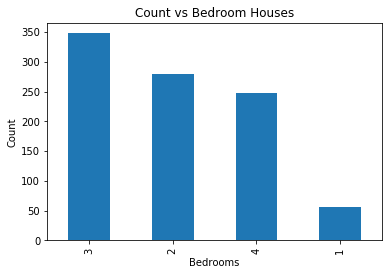

In [102]:
bd['No of bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Count vs Bedroom Houses')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sn.despine;

From graph above we can find that demand for 3 bedroom houses is the highest as the house sale with three bedrooms is highest, followed by 2 bedrooms and 4 and 1.

###### Plot the box plots to understand how prices influence the decision of 'how many rooms are necessary' for buying a house


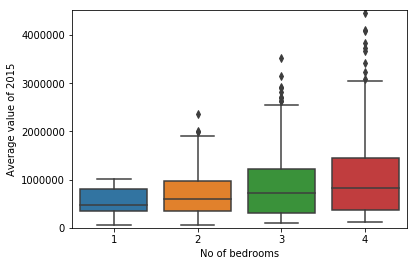

In [104]:
var = 'No of bedrooms'
data = pd.concat([bd['Average value of 2015'], bd[var]], axis=1)
f, ax = plt.subplots()
fig = sn.boxplot(x=var, y="Average value of 2015", data=bd)
fig.axis(ymin=0, ymax=4512825);

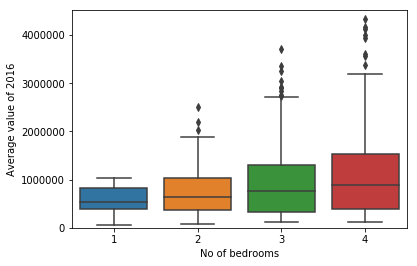

In [105]:
var = 'No of bedrooms'
data = pd.concat([bd['Average value of 2016'], bd[var]], axis=1)
f, ax = plt.subplots()
fig = sn.boxplot(x=var, y="Average value of 2016", data=bd)
fig.axis(ymin=0, ymax=4512825);

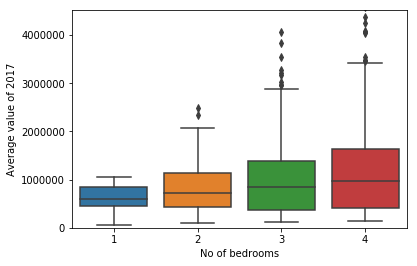

In [106]:
var = 'No of bedrooms'
data = pd.concat([bd['Average value of 2017'], bd[var]], axis=1)
f, ax = plt.subplots()
fig = sn.boxplot(x=var, y="Average value of 2017", data=bd)
fig.axis(ymin=0, ymax=4512825);

Box plots shows the distribution of a group, here in case of data for 'number of bedrooms vs average selling prices of particular region'.There is considerable difference in price differences between prices for 1-2 bedrooms and 3 to 4 bedroom houses. Also the upper whiskers for all type of number of bedrooms are higher than lower whiskers that shows the inclinations towards higher ends. People are paying more prices than median  price for one and two bedroom houses. 

###### Normalizing the Average price of 2017 and performing ranksum test

In [ ]:
bd['nrml_data']=bd.groupby('No of bedrooms')['Average value of 2017'].apply(lambda x: (x - x.mean())).map('{:f}'.format).astype('float')

###### Ranksum Test

In [108]:
from scipy.stats import f_oneway, ranksums
f_first = bd[(bd['No of bedrooms']==1)]['nrml_data']
f_second = bd[(bd['No of bedrooms']==2)]['nrml_data']
f_third = bd[(bd['No of bedrooms']==3)]['nrml_data']
f_fourth = bd[(bd['No of bedrooms']==4)]['nrml_data']

f_oneway(f_first, f_second, f_third,f_fourth)

ranksums(f_first, f_second)
ranksums(f_first, f_third)
ranksums(f_first, f_fourth)
ranksums(f_second, f_third)
ranksums(f_second, f_fourth)
ranksums(f_third, f_fourth)

F_onewayResult(statistic=1.0509607137813656e-23, pvalue=1.0)

RanksumsResult(statistic=0.91874828528261632, pvalue=0.35822724765008973)

RanksumsResult(statistic=1.8285732818213336, pvalue=0.067463558285806732)

RanksumsResult(statistic=2.8627628915193069, pvalue=0.0041996470733828605)

RanksumsResult(statistic=2.557994651221819, pvalue=0.010527771154933049)

RanksumsResult(statistic=3.750792938933087, pvalue=0.00017627622730564401)

RanksumsResult(statistic=2.4842806622710838, pvalue=0.012981345075827837)

Here we are using ranksum test to find if the prices of individual number of bedrooms affect the selling price per region. 
If the results for ranksum tests are greater than 0.5 then the two sample data influences each other. 

From test results above we can find that the ranksum test between selling price of one bedroom houses and three bedroom houses being greater than 0.5, they influences each other to a greater extent. 

Rest all samples show less than 0.5 pvalues and hence they are independent and does not influence each other. Price fluctuations between these groups does not create any fluctuations in demand for one, two, and four bedroom house sample datas.


#### Reference links:
#### http://www.stat.purdue.edu/~tqin/system101/method/method_wilcoxon_rank_sum_sas.htm

### Finding Three - Correlation Between Local Stock Market and Different Home Value

In [120]:
import datetime
import wbdata as wb
import seaborn as sn
from datetime import timedelta, date
from pandas_datareader import data
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

#### Get Stock Price

In [ ]:
!pip install wbdata

In [127]:
stock = {'GFDD.OM.02': 'Global Financial Development'}
im = {'SM.POP.NETM': 'Population estimates and projections'}

###### Get Applied Material stock, based in Santa Clara

In [175]:
AppliedM = get('AMAT','1-1-2015', datetime.date.today())

# Use only Close Price
AppliedM=AppliedM.loc[:,['Close']]

# Resample stock price monthly
AppliedM=AppliedM.resample('M').mean()

# Rename column
AppliedM=AppliedM.rename(columns={'Close':'AppliedMaterial'})
AppliedM.head()

,AppliedMaterial
Date,
2015-01-31,23.77
2015-02-28,24.32
2015-03-31,23.82
2015-04-30,21.75
2015-05-31,19.95


###### Get Cisco stock, based in San Jose

In [188]:
Cisco = get('CSCO','1-1-2015',datetime.date.today())

# Use only Close Price
Cisco = Cisco.loc[:,['Close']]

# Resample stock price monthly
Cisco=Cisco.resample('M').mean()

# Rename column
Cisco=Cisco.rename(columns={'Close':'Cisco'})
Cisco.head()

,Cisco
Date,
2015-01-31,27.57
2015-02-28,28.50
2015-03-31,28.38
2015-04-30,28.20
2015-05-31,29.27


###### Get Juniper stock, based in Sunnyvale

In [135]:
Juniper = get('JNPR','1-1-2015', datetime.date.today())

# Use only Close Price
Juniper = Juniper.loc[:,['Close']]

# Resample stock price monthly
Juniper = Juniper.resample('M').mean()

# Rename column
Juniper=Juniper.rename(columns={'Close':'Juniper'})
Juniper.head()

,Juniper
Date,
2015-01-31,22.24
2015-02-28,23.64
2015-03-31,23.34
2015-04-30,24.34
2015-05-31,27.26


###### Get Facebook stock, based in Menlo Park

In [136]:
Facebook = get('FB','1-1-2015',datetime.date.today())

# Use only Close Price
Facebook = Facebook.loc[:,['Close']]

# Resample stock price monthly
Facebook = Facebook.resample('M').mean()

# Rename column
Facebook=Facebook.rename(columns={'Close':'Facebook'})
Facebook.head()

,Facebook
Date,
2015-01-31,76.72
2015-02-28,76.95
2015-03-31,81.01
2015-04-30,82.09
2015-05-31,79.42


###### Get Google stock, based in Mountain View

In [137]:
Google = get('GOOGL','1-1-2015',datetime.date.today())

# Use only Close Price
Google = Google.loc[:,['Close']]

# Resample stock price monthly
Google=Google.resample('M').mean()

# Rename column
Google=Google.rename(columns={'Close':'Google'})
Google.head()

,Google
Date,
2015-01-31,515.92
2015-02-28,540.99
2015-03-31,565.97
2015-04-30,549.48
2015-05-31,547.68


#### Getting Single House's Home Value Data

In [147]:
single = pd.read_csv('Single.csv').rename(columns=lambda x: x.strip())

In [148]:
# Slice out 2015-2018 
single=single[single.columns[~single.columns.str.contains('1996-')]]
single=single[single.columns[~single.columns.str.contains('1997-')]]
single=single[single.columns[~single.columns.str.contains('1998-')]]
single=single[single.columns[~single.columns.str.contains('1999-')]]
single=single[single.columns[~single.columns.str.contains('2000-')]]
single=single[single.columns[~single.columns.str.contains('2001-')]]
single=single[single.columns[~single.columns.str.contains('2002-')]]
single=single[single.columns[~single.columns.str.contains('2003-')]]
single=single[single.columns[~single.columns.str.contains('2004-')]]
single=single[single.columns[~single.columns.str.contains('2005-')]]
single=single[single.columns[~single.columns.str.contains('2006-')]]
single=single[single.columns[~single.columns.str.contains('2007-')]]
single=single[single.columns[~single.columns.str.contains('2008-')]]
single=single[single.columns[~single.columns.str.contains('2009-')]]
single=single[single.columns[~single.columns.str.contains('2010-')]]
single=single[single.columns[~single.columns.str.contains('2011-')]]
single=single[single.columns[~single.columns.str.contains('2012-')]]
single=single[single.columns[~single.columns.str.contains('2013-')]]
single=single[single.columns[~single.columns.str.contains('2014-')]]


single['House Type']='single'
single.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
0,6181,New York,NY,New York,Queens,1,465500,466400,466800,468800,...,559000,563900,567600,571100,574900,578100,580400,584400,588900,single
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,552200,556100,559200,562900,...,665800,669100,671800,675900,681700,686900,692400,698000,701900,single
2,17426,Chicago,IL,Chicago,Cook,3,168400,168200,168600,169600,...,194200,194700,194800,195500,196700,198000,198500,198700,199600,single
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,173000,172900,173000,173400,...,196400,198000,199600,201300,202900,204200,205800,207500,208900,single
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,183400,184600,186100,187900,...,225700,227800,229500,230900,232500,234600,236300,237200,238000,single


#### Getting Condo Home Value Data

In [149]:
condo = pd.read_csv('Condo.csv').rename(columns=lambda x: x.strip())

In [150]:
# Slice out 2015-2018 
condo=condo[condo.columns[~condo.columns.str.contains('1996-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1997-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1998-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1999-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2000-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2001-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2002-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2003-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2004-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2005-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2006-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2007-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2008-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2009-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2009-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2010-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2011-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2012-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2013-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2014-')]]
condo['House Type']='condo'
condo.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
0,6181,New York,NY,New York,Queens,1,610900,616300,623000,628800,...,803300,828400,838700,843800,851800,862100,868900.00,871900.00,876700.00,condo
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,436000,438600,441600,444300,...,511400,513900,516800,521500,526800,532800,539600.00,545800.00,549500.00,condo
2,17426,Chicago,IL,Chicago,Cook,3,213300,213700,215700,217900,...,240100,240800,241900,242600,242400,241000,239400.00,238700.00,239100.00,condo
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,96400,96400,96700,97300,...,119600,119900,119800,120600,122200,123400,124200.00,125000.00,125800.00,condo
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,115000,115300,116100,117000,...,140400,141900,143400,144900,146700,148300,149500.00,150600.00,151500.00,condo


###### Slice out Santa Clara Part - Single home

In [165]:
sc=single[(single['RegionName']=='Santa Clara') & (single['State']=='CA')]

##### Slice out monthly home value column

In [166]:
scsingle=sc.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]

In [167]:
scsingle.columns = pd.to_datetime(scsingle.columns,format='%Y%m', errors='ignore')
scsingle=scsingle.transpose()
scsingle.columns=['HomeValueSingle']
scsingle.head()

,HomeValueSingle
2015-01,886300
2015-02,899000
2015-03,915700
2015-04,933700
2015-05,949600


###### Slice out Santa Clara Part - Condo

In [168]:
sc1=condo[(condo['RegionName']=='Santa Clara') & (condo['State']=='CA')]

##### Slice out monthly home value column

In [169]:
sccondo=sc1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]

In [170]:
sccondo.columns = pd.to_datetime(sccondo.columns,format='%Y%m', errors='ignore')
sccondo=sccondo.transpose()
sccondo.columns=['HomeValueCondo']
sccondo.head()

,HomeValueCondo
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


###### Concatenate SC home value single+condo

In [173]:
AM = pd.concat([scsingle, sccondo], axis=1)
AM.index = pd.to_datetime(AM.index,format='%Y%m', errors='ignore')
AM.head()

,HomeValueSingle,HomeValueCondo
2015-01,886300,594500.00
2015-02,899000,601300.00
2015-03,915700,611500.00
2015-04,933700,625300.00
2015-05,949600,640600.00


In [176]:
# re-format the date before joining
AppliedM.index = AppliedM.index.strftime('%Y-%m')

###### Concatenate stock with Santa Clara home value

In [177]:
AM1 = pd.concat([AppliedM, AM], axis=1)
AM1.head()

,AppliedMaterial,HomeValueSingle,HomeValueCondo
2015-01,23.77,886300.00,594500.00
2015-02,24.32,899000.00,601300.00
2015-03,23.82,915700.00,611500.00
2015-04,21.75,933700.00,625300.00
2015-05,19.95,949600.00,640600.00


###### Getting stock and home values for San Jose

In [197]:
# Single Home
sj=single[(single['RegionName']=='San Jose') & (single['State']=='CA')]
sjsingle=sj.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
sjsingle.columns = pd.to_datetime(sjsingle.columns,format='%Y%m', errors='ignore')
sjsingle=sjsingle.transpose()
sjsingle.columns=['HomeValueSingle']

# Condo Home
sj1=condo[(condo['RegionName']=='Santa Clara') & (condo['State']=='CA')]
sjcondo=sj1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
sjcondo.columns = pd.to_datetime(sjcondo.columns,format='%Y%m', errors='ignore')
sjcondo=sjcondo.transpose()
sjcondo.columns=['HomeValueCondo']

# Concatenate SJ home value single+condo
CS = pd.concat([sjsingle, sjcondo], axis=1)
CS.index = pd.to_datetime(CS.index,format='%Y%m', errors='ignore')
CS.head()

,HomeValueSingle,HomeValueCondo
2015-01,783800,594500.00
2015-02,793000,601300.00
2015-03,803700,611500.00
2015-04,815100,625300.00
2015-05,826200,640600.00


In [190]:
# re-format the date before joining
Cisco.index = Cisco.index.strftime('%Y-%m')

# Concatenate stock with SJ home value
CS1 = pd.concat([CS, Cisco], axis=1)
CS1.head()

,HomeValueSingle,HomeValueCondo,Cisco
2015-01,783800.00,594500.00,27.57
2015-02,793000.00,601300.00,28.50
2015-03,803700.00,611500.00,28.38
2015-04,815100.00,625300.00,28.20
2015-05,826200.00,640600.00,29.27


###### Getting stock and home values for Sunnyvale

In [199]:
# Single Home
sv=single[(single['RegionName']=='Sunnyvale') & (single['State']=='CA')]
svsingle=sv.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
svsingle.columns = pd.to_datetime(svsingle.columns,format='%Y%m', errors='ignore')
svsingle=svsingle.transpose()
svsingle.columns=['HomeValueSingle']

# Condo Home
sv1=condo[(condo['RegionName']=='Sunnyvale') & (condo['State']=='CA')]
svcondo=sv1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
svcondo.columns = pd.to_datetime(svcondo.columns,format='%Y%m', errors='ignore')
svcondo=svcondo.transpose()
svcondo.columns=['HomeValueCondo']

# Concatenate SV home value single+condo
JP = pd.concat([svsingle, svcondo], axis=1)
JP.index = pd.to_datetime(JP.index,format='%Y%m', errors='ignore')
JP.head()

,HomeValueSingle,HomeValueCondo
2015-01,1348600,787300.00
2015-02,1371000,797300.00
2015-03,1395900,809100.00
2015-04,1424200,822100.00
2015-05,1456900,838100.00


In [194]:
# re-format the date before joining
Juniper.index = Juniper.index.strftime('%Y-%m')

# Concatenate stock with SV home value
JP1 = pd.concat([JP, Juniper], axis=1)
JP1.head()

,HomeValueSingle,HomeValueCondo,Juniper
2015-01,1348600.00,787300.00,22.24
2015-02,1371000.00,797300.00,23.64
2015-03,1395900.00,809100.00,23.34
2015-04,1424200.00,822100.00,24.34
2015-05,1456900.00,838100.00,27.26


###### Getting stock and home values for Menlo Park

In [195]:
# Single Home
mp=single[(single['RegionName']=='Menlo Park') & (single['State']=='CA')]
mpsingle=mp.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mpsingle.columns = pd.to_datetime(mpsingle.columns,format='%Y%m', errors='ignore')
mpsingle=mpsingle.transpose()
mpsingle.columns=['HomeValueSingle']

# Condo Home
mp1=condo[(condo['RegionName']=='Menlo Park') & (condo['State']=='CA')]
mpcondo=sc1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mpcondo.columns = pd.to_datetime(mpcondo.columns,format='%Y%m', errors='ignore')
mpcondo=mpcondo.transpose()
mpcondo.columns=['HomeValueCondo']

# Concatenate MP home value single+condo
FB = pd.concat([mpsingle, mpcondo], axis=1)
FB.index = pd.to_datetime(FB.index,format='%Y%m', errors='ignore')
FB.head()

,HomeValueSingle,HomeValueCondo
2015-01,1865200,594500.00
2015-02,1900700,601300.00
2015-03,1938200,611500.00
2015-04,1970300,625300.00
2015-05,1998800,640600.00


In [196]:
# re-format the date before joining
Facebook.index = Facebook.index.strftime('%Y-%m')

# Concatenate stock with MP home value
FB1 = pd.concat([FB, Facebook], axis=1)
FB1.head()

,HomeValueSingle,HomeValueCondo,Facebook
2015-01,1865200.00,594500.00,76.72
2015-02,1900700.00,601300.00,76.95
2015-03,1938200.00,611500.00,81.01
2015-04,1970300.00,625300.00,82.09
2015-05,1998800.00,640600.00,79.42


###### Getting stock and home values for Mountain View

In [200]:
# Single Home
mv=single[(single['RegionName']=='Mountain View') & (single['State']=='CA')]
mvsingle=mv.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mvsingle.columns = pd.to_datetime(mvsingle.columns,format='%Y%m', errors='ignore')
mvsingle=mvsingle.transpose()
mvsingle.columns=['HomeValueSingle']

# Condo Home
mv1=condo[(condo['RegionName']=='Mountain View') & (condo['State']=='CA')]
mvcondo=mv1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mvcondo.columns = pd.to_datetime(mvcondo.columns,format='%Y%m', errors='ignore')
mvcondo=mvcondo.transpose()
mvcondo.columns=['HomeValueCondo']
# Concatenate MV home value single+condo
GG = pd.concat([mvsingle, mvcondo], axis=1)
GG.index = pd.to_datetime(GG.index,format='%Y%m', errors='ignore')
GG.head()

,HomeValueSingle,HomeValueCondo
2015-01,1484200,815600.00
2015-02,1518300,827700.00
2015-03,1553000,843300.00
2015-04,1590200,862100.00
2015-05,1623500,883800.00


In [201]:
# re-format the date before joining
Google.index = Google.index.strftime('%Y-%m')

# Concatenate stock with MV home value
GG1 = pd.concat([GG, Google], axis=1)
GG1.head()

,HomeValueSingle,HomeValueCondo,Google
2015-01,1484200.00,815600.00,515.92
2015-02,1518300.00,827700.00,540.99
2015-03,1553000.00,843300.00,565.97
2015-04,1590200.00,862100.00,549.48
2015-05,1623500.00,883800.00,547.68


#### Find Correlation Between Home Value and Stock Prices

Facebook-Menlo Park Correlation

###### Normalize data

In [203]:
FB2=FB1.copy()
FB2['normst']=(FB2['Facebook']-FB2['Facebook'].mean())/(FB2['Facebook'].max()-FB2['Facebook'].min())
FB2['normsh']=(FB2['HomeValueSingle']-FB2['HomeValueSingle'].mean())/(FB2['HomeValueSingle'].max()-FB2['HomeValueSingle'].min())
FB2['normch']=(FB2['HomeValueCondo']-FB2['HomeValueCondo'].mean())/(FB2['HomeValueCondo'].max()-FB2['HomeValueCondo'].min())

FB2.head()

,HomeValueSingle,HomeValueCondo,Facebook,normst,normsh,normch
2015-01,1865200.00,594500.00,76.72,-0.45,-0.41,-0.42
2015-02,1900700.00,601300.00,76.95,-0.45,-0.34,-0.40
2015-03,1938200.00,611500.00,81.01,-0.41,-0.27,-0.37
2015-04,1970300.00,625300.00,82.09,-0.40,-0.21,-0.33
2015-05,1998800.00,640600.00,79.42,-0.42,-0.16,-0.28


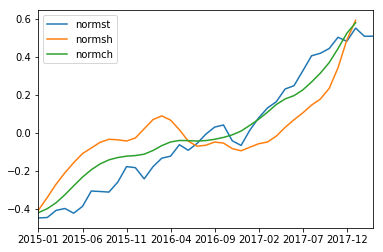

In [204]:
%matplotlib inline
FB2[['normst','normsh','normch']].plot();

In [206]:
FB2[['HomeValueSingle','HomeValueCondo','Facebook']].corr()

,HomeValueSingle,HomeValueCondo,Facebook
HomeValueSingle,1.00,0.90,0.82
HomeValueCondo,0.90,1.00,0.98
Facebook,0.82,0.98,1.00


###### Juniper-Sunnyvale Correlation

In [211]:
# Normalize data

JP2=JP1.copy()
JP2['normst']=(JP2['Juniper']-JP2['Juniper'].mean())/(JP2['Juniper'].max()-JP2['Juniper'].min())
JP2['normsh']=(JP2['HomeValueSingle']-JP2['HomeValueSingle'].mean())/(JP2['HomeValueSingle'].max()-JP2['HomeValueSingle'].min())
JP2['normch']=(JP2['HomeValueCondo']-JP2['HomeValueCondo'].mean())/(JP2['HomeValueCondo'].max()-JP2['HomeValueCondo'].min())

JP2.head()

,HomeValueSingle,HomeValueCondo,Juniper,normst,normsh,normch
2015-01,1348600.00,787300.00,22.24,-0.50,-0.40,-0.39
2015-02,1371000.00,797300.00,23.64,-0.33,-0.37,-0.36
2015-03,1395900.00,809100.00,23.34,-0.36,-0.33,-0.34
2015-04,1424200.00,822100.00,24.34,-0.24,-0.28,-0.30
2015-05,1456900.00,838100.00,27.26,0.12,-0.23,-0.27


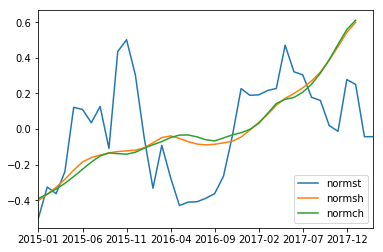

In [209]:
JP2[['normst','normsh','normch']].plot();

In [210]:
JP2[['HomeValueSingle','HomeValueCondo','Juniper']].corr()

,HomeValueSingle,HomeValueCondo,Juniper
HomeValueSingle,1.00,1.00,0.47
HomeValueCondo,1.00,1.00,0.43
Juniper,0.47,0.43,1.00


As seen, Juniper stock prices have a lower correlation with Single Homes and Condos

###### Cisco-San Jose Correlation 

In [212]:
# Normalize data
CS2=CS1.copy()
CS2['normst']=(CS2['Cisco']-CS2['Cisco'].mean())/(CS2['Cisco'].max()-CS2['Cisco'].min())
CS2['normsh']=(CS2['HomeValueSingle']-CS2['HomeValueSingle'].mean())/(CS2['HomeValueSingle'].max()-CS2['HomeValueSingle'].min())
CS2['normch']=(CS2['HomeValueCondo']-CS2['HomeValueCondo'].mean())/(CS2['HomeValueCondo'].max()-CS2['HomeValueCondo'].min())
CS2.head()

,HomeValueSingle,HomeValueCondo,Cisco,normst,normsh,normch
2015-01,783800.00,594500.00,27.57,-0.16,-0.38,-0.42
2015-02,793000.00,601300.00,28.50,-0.12,-0.35,-0.40
2015-03,803700.00,611500.00,28.38,-0.12,-0.32,-0.37
2015-04,815100.00,625300.00,28.20,-0.13,-0.29,-0.33
2015-05,826200.00,640600.00,29.27,-0.08,-0.25,-0.28


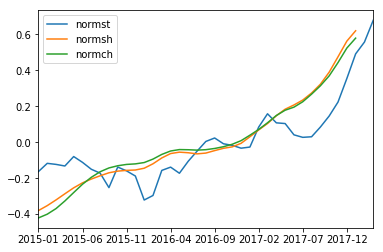

In [213]:
CS2[['normst','normsh','normch']].plot();

In [214]:
CS2[['HomeValueSingle','HomeValueCondo','Cisco']].corr()

,HomeValueSingle,HomeValueCondo,Cisco
HomeValueSingle,1.00,1.00,0.86
HomeValueCondo,1.00,1.00,0.82
Cisco,0.86,0.82,1.00


###### Applied Materials-Santa Clara  Correlation 

In [218]:
# Normalize data

AM2=AM1.copy()
AM2['normst']=(AM2['AppliedMaterial']-AM2['AppliedMaterial'].mean())/(AM2['AppliedMaterial'].max()-AM2['AppliedMaterial'].min())
AM2['normsh']=(AM2['HomeValueSingle']-AM2['HomeValueSingle'].mean())/(AM2['HomeValueSingle'].max()-AM2['HomeValueSingle'].min())
AM2['normch']=(AM2['HomeValueCondo']-AM2['HomeValueCondo'].mean())/(AM2['HomeValueCondo'].max()-AM2['HomeValueCondo'].min())
AM2.head()

,AppliedMaterial,HomeValueSingle,HomeValueCondo,normst,normsh,normch
2015-01,23.77,886300.00,594500.00,-0.18,-0.39,-0.42
2015-02,24.32,899000.00,601300.00,-0.16,-0.36,-0.40
2015-03,23.82,915700.00,611500.00,-0.18,-0.33,-0.37
2015-04,21.75,933700.00,625300.00,-0.22,-0.30,-0.33
2015-05,19.95,949600.00,640600.00,-0.26,-0.27,-0.28


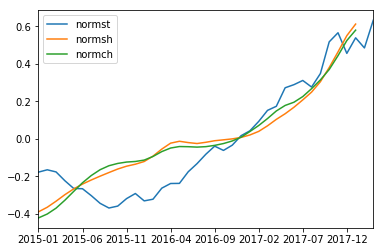

In [219]:
AM2[['normst','normsh','normch']].plot();

In [220]:
AM2[['HomeValueSingle','HomeValueCondo','AppliedMaterial']].corr()

,HomeValueSingle,HomeValueCondo,AppliedMaterial
HomeValueSingle,1.00,0.99,0.89
HomeValueCondo,0.99,1.00,0.88
AppliedMaterial,0.89,0.88,1.00


###### Google-Mountain View Correlation 

In [240]:
# Normalize data

GG2=GG1.copy()
GG2['normst']=(GG2['Google']-GG2['Google'].mean())/(GG2['Google'].max()-GG2['Google'].min())
GG2['normsh']=(GG2['HomeValueSingle']-GG2['HomeValueSingle'].mean())/(GG2['HomeValueSingle'].max()-GG2['HomeValueSingle'].min())
GG2['normch']=(GG2['HomeValueCondo']-GG2['HomeValueCondo'].mean())/(GG2['HomeValueCondo'].max()-GG2['HomeValueCondo'].min())
GG2.head()

,HomeValueSingle,HomeValueCondo,Google,normst,normsh,normch
2015-01,1484200.00,815600.00,515.92,-0.46,-0.41,-0.44
2015-02,1518300.00,827700.00,540.99,-0.42,-0.36,-0.41
2015-03,1553000.00,843300.00,565.97,-0.38,-0.31,-0.38
2015-04,1590200.00,862100.00,549.48,-0.40,-0.26,-0.34
2015-05,1623500.00,883800.00,547.68,-0.40,-0.21,-0.29


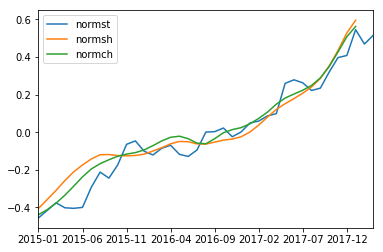

In [241]:
GG2[['normst','normsh','normch']].plot();

In [242]:
GG2[['HomeValueSingle','HomeValueCondo','Google']].corr()

,HomeValueSingle,HomeValueCondo,Google
HomeValueSingle,1.00,0.99,0.95
HomeValueCondo,0.99,1.00,0.98
Google,0.95,0.98,1.00


From the correlation data and the graph above in five regions, most of the case, stock price is highly related to Home Value, no matter what house type or which area.

However, Sunnyvale part is an exception due to certain government policy that home value is severely controlled, and in this case, correlation in Suunyvale part cannot be viewed as representative.

#### How Google stock price influence home values in Santa Clara and San Jose regions

###### Google - Santa Clara

In [243]:
AM3 = pd.concat([Google, AM], axis=1)
AM3.head()

,Google,HomeValueSingle,HomeValueCondo
2015-01,515.92,886300.00,594500.00
2015-02,540.99,899000.00,601300.00
2015-03,565.97,915700.00,611500.00
2015-04,549.48,933700.00,625300.00
2015-05,547.68,949600.00,640600.00


In [244]:
# Normalize data
AM4=AM3.copy()
AM4['normst']=(AM4['Google']-AM4['Google'].mean())/(AM4['Google'].max()-AM4['Google'].min())
AM4['normsh']=(AM4['HomeValueSingle']-AM4['HomeValueSingle'].mean())/(AM4['HomeValueSingle'].max()-AM4['HomeValueSingle'].min())
AM4['normch']=(AM4['HomeValueCondo']-AM4['HomeValueCondo'].mean())/(AM4['HomeValueCondo'].max()-AM4['HomeValueCondo'].min())
AM4.head()

,Google,HomeValueSingle,HomeValueCondo,normst,normsh,normch
2015-01,515.92,886300.00,594500.00,-0.46,-0.39,-0.42
2015-02,540.99,899000.00,601300.00,-0.42,-0.36,-0.40
2015-03,565.97,915700.00,611500.00,-0.38,-0.33,-0.37
2015-04,549.48,933700.00,625300.00,-0.40,-0.30,-0.33
2015-05,547.68,949600.00,640600.00,-0.40,-0.27,-0.28


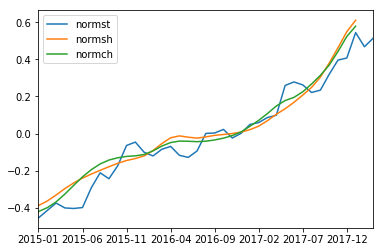

In [246]:
AM4[['normst','normsh','normch']].plot();

In [247]:
AM4[['HomeValueSingle','HomeValueCondo','Google']].corr()

,HomeValueSingle,HomeValueCondo,Google
HomeValueSingle,1.00,0.99,0.96
HomeValueCondo,0.99,1.00,0.97
Google,0.96,0.97,1.00


###### Google - San Jose

In [248]:
CS3 = pd.concat([CS, Google], axis=1)
CS3.head()

,HomeValueSingle,HomeValueCondo,Google
2015-01,783800.00,594500.00,515.92
2015-02,793000.00,601300.00,540.99
2015-03,803700.00,611500.00,565.97
2015-04,815100.00,625300.00,549.48
2015-05,826200.00,640600.00,547.68


In [249]:
# Normalize data

CS4=CS3.copy()
CS4['normst']=(CS4['Google']-CS4['Google'].mean())/(CS4['Google'].max()-CS4['Google'].min())
CS4['normsh']=(CS4['HomeValueSingle']-CS4['HomeValueSingle'].mean())/(CS4['HomeValueSingle'].max()-CS4['HomeValueSingle'].min())
CS4['normch']=(CS4['HomeValueCondo']-CS4['HomeValueCondo'].mean())/(CS4['HomeValueCondo'].max()-CS4['HomeValueCondo'].min())
CS4.head()

,HomeValueSingle,HomeValueCondo,Google,normst,normsh,normch
2015-01,783800.00,594500.00,515.92,-0.46,-0.38,-0.42
2015-02,793000.00,601300.00,540.99,-0.42,-0.35,-0.40
2015-03,803700.00,611500.00,565.97,-0.38,-0.32,-0.37
2015-04,815100.00,625300.00,549.48,-0.40,-0.29,-0.33
2015-05,826200.00,640600.00,547.68,-0.40,-0.25,-0.28


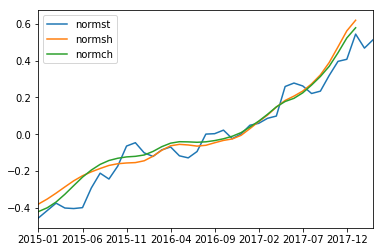

In [250]:
CS4[['normst','normsh','normch']].plot();

In [251]:
CS4[['HomeValueSingle','HomeValueCondo','Google']].corr()

,HomeValueSingle,HomeValueCondo,Google
HomeValueSingle,1.00,1.00,0.96
HomeValueCondo,1.00,1.00,0.97
Google,0.96,0.97,1.00


From the tables and graphs above, we can see that Google stock price is still highly correlated to home vValues in Santa Clara and San Jose and not just Mountain View, where Google is based. 
Thus, we can safely conclude that 'Google Magic' is all through the Bay Area with regards to home values.